In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

pd.set_option('display.max_columns', None)


In [2]:
df = pd.read_csv('rossmann-store-sales-forecasting-analysis.csv')
print("Dataset loaded successfully!")
df.head()


Dataset loaded successfully!


C:\Users\Administrator\AppData\Local\Temp\ipykernel_11972\234030914.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('rossmann-store-sales-forecasting-analysis.csv')


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [13]:
print(" FIRST 5 ROWS:")
display(df.head())

print(" LAST 5 ROWS:")
display(df.tail())

print("\n Shape of Dataset:", df.shape)
print("\n Column Names:", df.columns.tolist())
print("\n Data Types:\n", df.dtypes)
print("\n Missing Values:\n", df.isnull().sum())
print("\n Unique Values per Column:\n", df.nunique())


 FIRST 5 ROWS:


,store,dayofweek,date,sales,customers,open,promo,stateholiday,schoolholiday
0,1,5,941,5263,555,1,1,0,1
1,2,5,941,6064,625,1,1,0,1
2,3,5,941,8314,821,1,1,0,1
3,4,5,941,13995,1498,1,1,0,1
4,5,5,941,4822,559,1,1,0,1


 LAST 5 ROWS:


,store,dayofweek,date,sales,customers,open,promo,stateholiday,schoolholiday
1017204,1111,2,0,0,0,0,0,a,1
1017205,1112,2,0,0,0,0,0,a,1
1017206,1113,2,0,0,0,0,0,a,1
1017207,1114,2,0,0,0,0,0,a,1
1017208,1115,2,0,0,0,0,0,a,1



 Shape of Dataset: (1017209, 9)

 Column Names: ['store', 'dayofweek', 'date', 'sales', 'customers', 'open', 'promo', 'stateholiday', 'schoolholiday']

 Data Types:
 store             int64
dayofweek         int64
date              int64
sales             int64
customers         int64
open              int64
promo             int64
stateholiday     object
schoolholiday     int64
dtype: object

 Missing Values:
 store            0
dayofweek        0
date             0
sales            0
customers        0
open             0
promo            0
stateholiday     0
schoolholiday    0
dtype: int64

 Unique Values per Column:
 store             1115
dayofweek            7
date               942
sales            21734
customers         4086
open                 2
promo                2
stateholiday         5
schoolholiday        2
dtype: int64


In [14]:
print("\n Duplicate Rows:", df.duplicated().sum())

if 'Age' in df.columns:
    print("\n Negative Ages:", df[df['Age'] < 0])

# Formatting issues
df.columns = df.columns.str.strip().str.replace(' ', '_').str.lower()



 Duplicate Rows: 0


In [15]:
df = df.fillna(df.median(numeric_only=True))
df = df.fillna(df.mode().iloc[0])
df = df.drop_duplicates()
print("Data cleaning completed!")


Data cleaning completed!


In [16]:
print("\n DESCRIPTIVE STATS:\n", df.describe())
print("\n Skewness:\n", df.skew(numeric_only=True))
print("\n Kurtosis:\n", df.kurtosis(numeric_only=True))



 DESCRIPTIVE STATS:
               store     dayofweek          date         sales     customers  \
count  1.017209e+06  1.017209e+06  1.017209e+06  1.017209e+06  1.017209e+06   
mean   5.584297e+02  3.998341e+00  4.650630e+02  5.773819e+03  6.331459e+02   
std    3.219087e+02  1.997391e+00  2.744541e+02  3.849926e+03  4.644117e+02   
min    1.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    2.800000e+02  2.000000e+00  2.280000e+02  3.727000e+03  4.050000e+02   
50%    5.580000e+02  4.000000e+00  4.560000e+02  5.744000e+03  6.090000e+02   
75%    8.380000e+02  6.000000e+00  7.100000e+02  7.856000e+03  8.370000e+02   
max    1.115000e+03  7.000000e+00  9.410000e+02  4.155100e+04  7.388000e+03   

               open         promo  schoolholiday  
count  1.017209e+06  1.017209e+06   1.017209e+06  
mean   8.301067e-01  3.815145e-01   1.786467e-01  
std    3.755392e-01  4.857586e-01   3.830564e-01  
min    0.000000e+00  0.000000e+00   0.000000e+00  
25%    1.00

In [34]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np

le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].astype(str)
    df[col] = le.fit_transform(df[col])


scaler = StandardScaler()
num_cols = df.select_dtypes(include=np.number).columns


df[num_cols] = df[num_cols].fillna(df[num_cols].median())



df[num_cols] = scaler.fit_transform(df[num_cols])

print("Encoding and scaling done successfully — no type errors now!")


Encoding and scaling done successfully — no type errors now!


In [28]:
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
print("Outliers treated using IQR method!")


Outliers treated using IQR method!


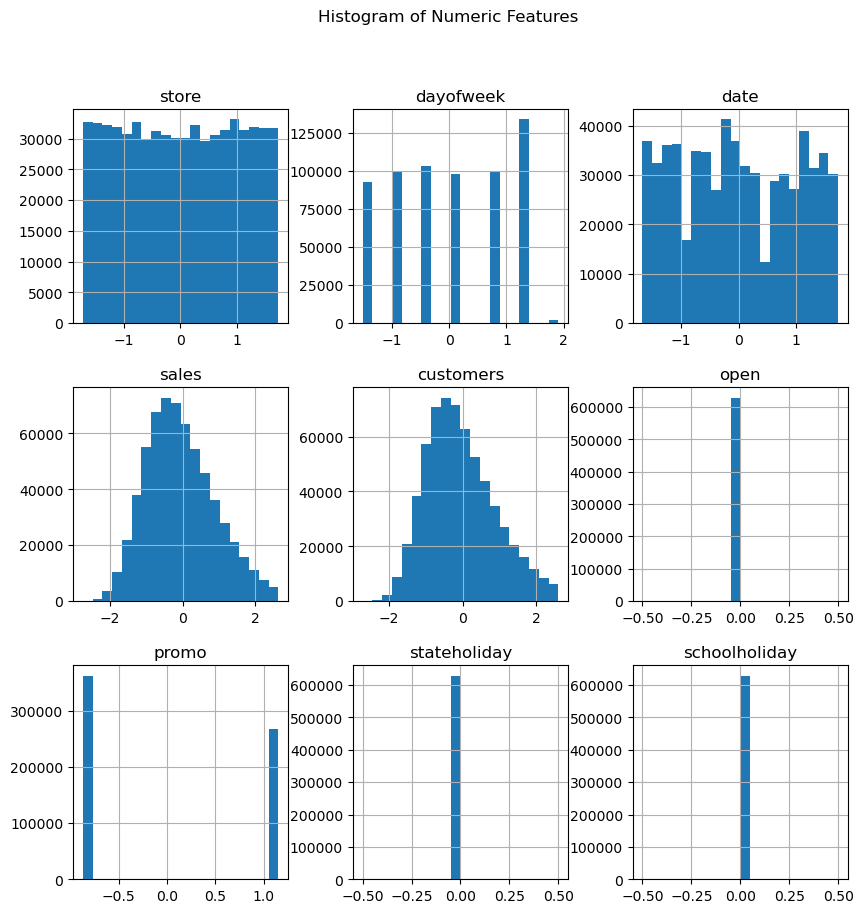

In [29]:
df.hist(figsize=(10, 10), bins=20)
plt.suptitle("Histogram of Numeric Features")
plt.show()


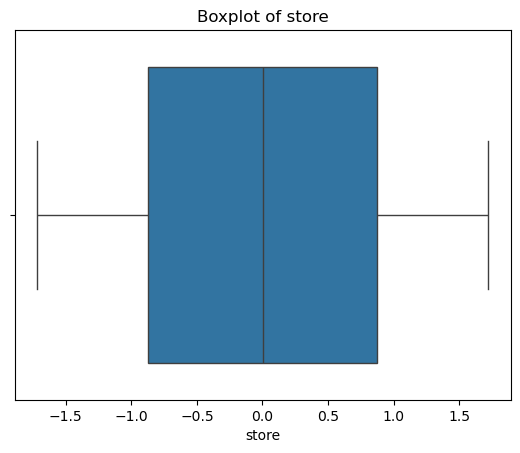

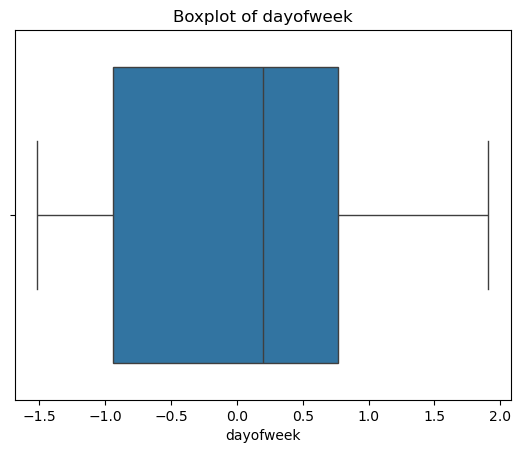

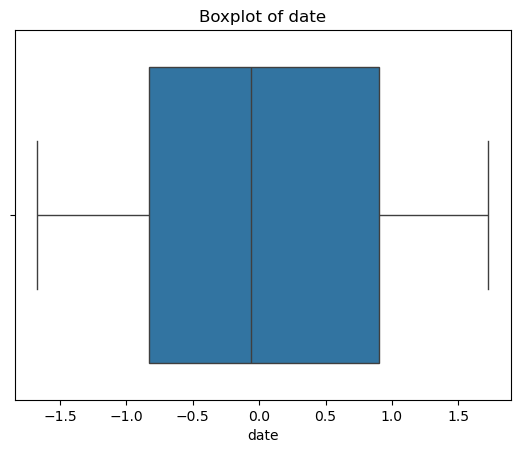

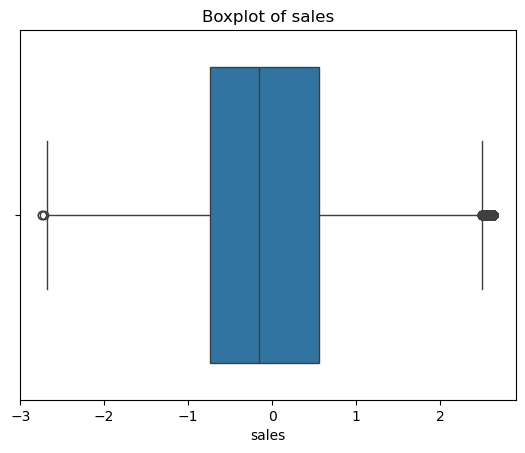

In [30]:
for col in df.select_dtypes(include=np.number).columns[:4]:
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


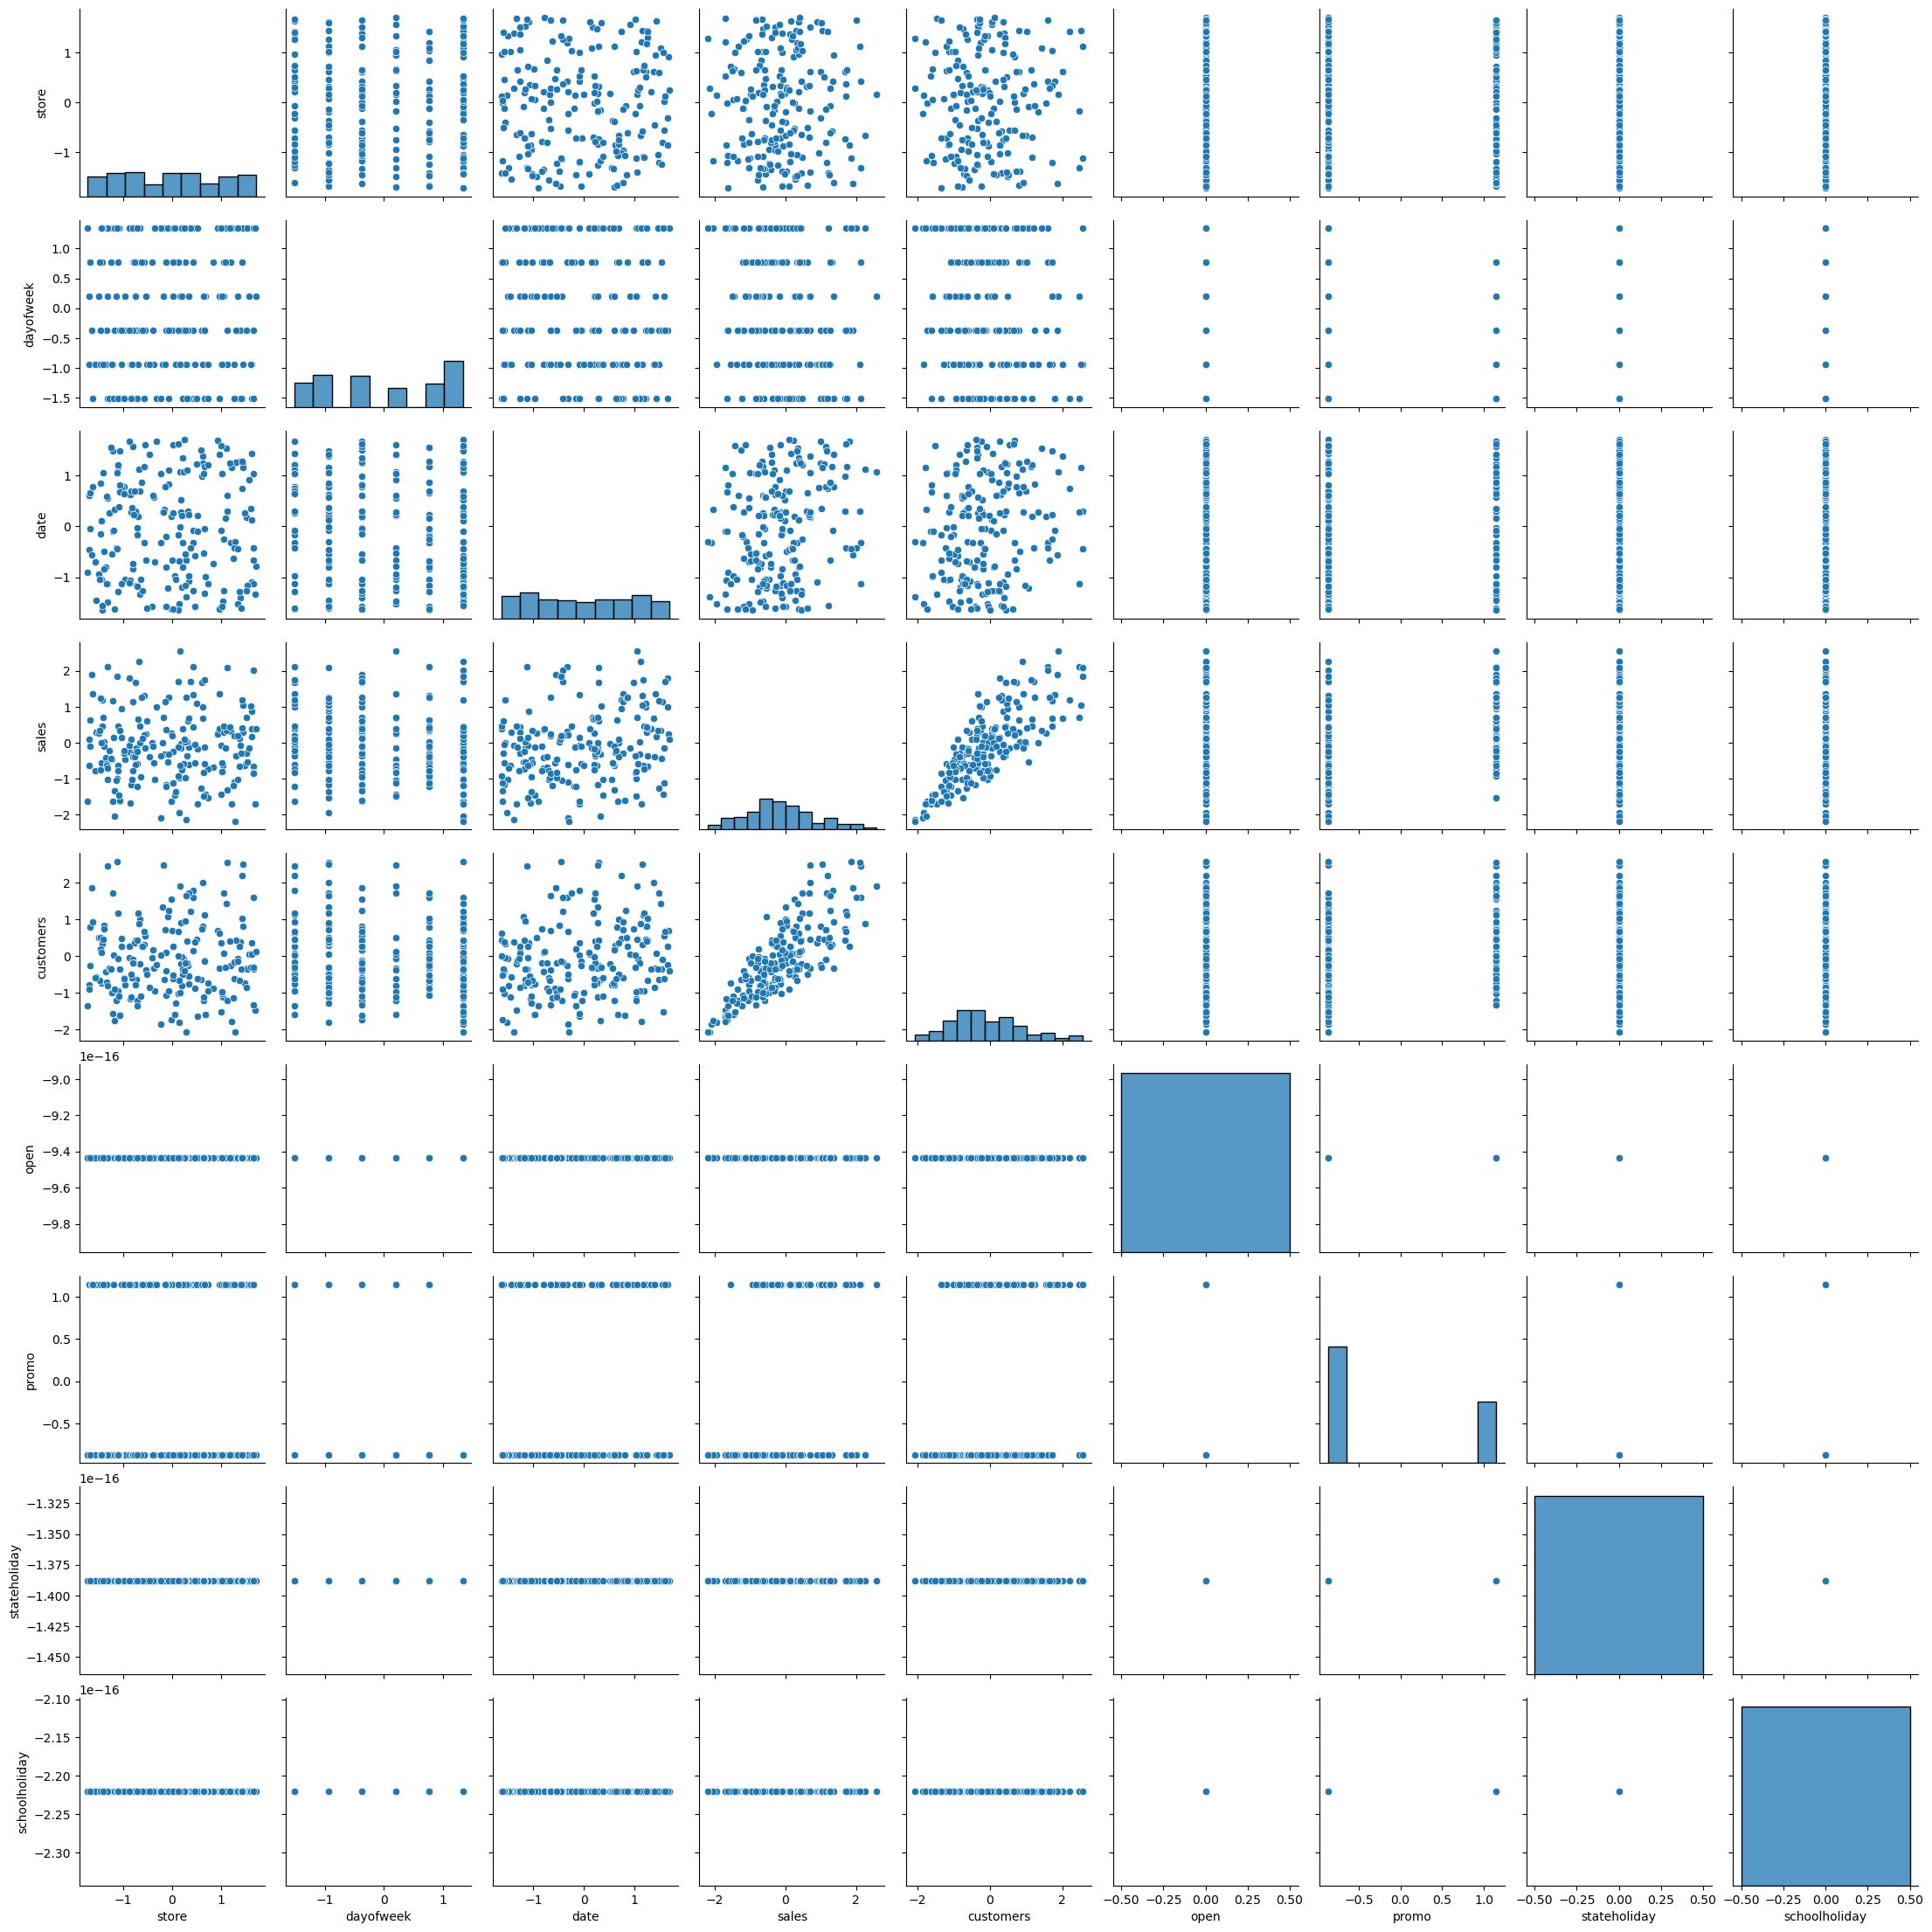

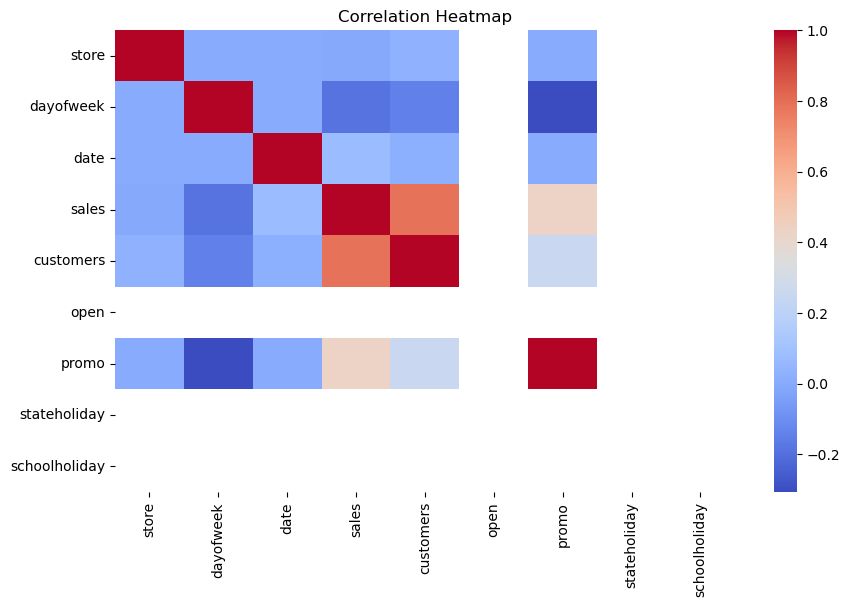

In [31]:
sns.pairplot(df.sample(min(len(df), 200)))
plt.show()

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()
